In [11]:
%reload_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from nlp_dauphine.preprocess_texts import (
    load_data,
    find_language
)
from nlp_dauphine.utils import set_working_dir
set_working_dir()

Current working dir: c:/Users/Hugo/Documents/Travail/A5/Dauphine_challenge/nlp_dauphine


# NLP Analysis (FED-ECB)
This notebook aims at highlighting our discoveries and thought process on our data.

In [13]:
path = Path("data")
files_path = {
    "ecb": Path(path,"ecb_data.csv"),
    "fed": Path(path,"fed_data.csv"),
    "train_series": Path(path,"train_series.csv"),
}

# LOAD TEXT DATA
df_ecb, df_fed, df_train_series = load_data(files_path)
print(df_ecb.shape, df_fed.shape, df_train_series.shape)

(1772, 3) (739, 3) (8946, 14)


In [14]:
df_train_series.info()
df_train_series.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8946 entries, 0 to 8945
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  8946 non-null   object 
 1   Index - 9   8946 non-null   float64
 2   Index - 8   8946 non-null   float64
 3   Index - 7   8946 non-null   float64
 4   Index - 6   8946 non-null   float64
 5   Index - 5   8946 non-null   float64
 6   Index - 4   8946 non-null   float64
 7   Index - 3   8946 non-null   float64
 8   Index - 2   8946 non-null   float64
 9   Index - 1   8946 non-null   float64
 10  Index - 0   8946 non-null   float64
 11  index ecb   8946 non-null   object 
 12  index fed   8946 non-null   object 
 13  Index + 1   8946 non-null   float64
dtypes: float64(11), object(3)
memory usage: 1.0+ MB


,Index Name,Index - 9,Index - 8,Index - 7,Index - 6,Index - 5,Index - 4,Index - 3,Index - 2,Index - 1,Index - 0,index ecb,index fed,Index + 1
0,V2X Index,0.001045,0.005841,0.003832,-0.027519,-0.103565,-0.045086,-0.011265,0.005164,0.054050,0.015779,"1126,1471",96,0.010597
1,MOVE Index,-0.021497,0.007891,-0.013175,-0.008436,0.000000,0.026303,0.000556,0.001455,0.007422,0.000000,975,568,0.014492
2,SPX Index,-0.001872,-0.008154,0.023588,0.004086,0.003493,0.003300,0.000885,-0.011304,0.005040,0.000156,"78,806","328,695",0.016263
3,SPX Index,0.004980,-0.000864,0.001677,0.000000,0.006030,-0.001083,0.000419,0.001492,0.001018,-0.002582,"560,1405",118,0.013581
4,EURUSD Curncy,0.000360,-0.001893,0.005579,-0.003056,-0.001171,-0.001623,-0.002350,-0.006444,-0.000729,-0.000365,404,261,0.005092


In [15]:
df_ecb.info()
df_ecb.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 1771
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1772 non-null   object
 1   speaker  1771 non-null   object
 2   text     1738 non-null   object
dtypes: object(3)
memory usage: 55.4+ KB


,title,speaker,text
0,Comments by Yves Mersch at Financial Services ...,Yves Mersch,Comments by Yves Mersch at Financial Service...
1,Securing sustained economic growth in the euro...,Vítor Constâncio,Securing sustained economic growth in the eu...
2,The role of monetary policy in addressing the ...,Mario Draghi,The role of monetary policy in addressing th...
3,The pandemic emergency: the three challenges f...,Philip R. Lane,SPEECH The pandemic emergency: the three c...
4,Transmission channels of monetary policy in th...,Peter Praet,Transmission channels of monetary policy in ...


In [16]:
df_fed.info()
df_fed.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    739 non-null    object
 1   speaker  737 non-null    object
 2   text     739 non-null    object
dtypes: object(3)
memory usage: 23.1+ KB


,title,speaker,text
0,The Importance of Economic Education and Finan...,Governor Frederic S. Mishkin,As ...
1,Financial Innovation and Consumer Protection,Chairman Ben S. Bernanke,"The concept of financial innovation, it seems..."
2,Implementing Basel II in the United States,Governor Randall S. Kroszner,Good afternoon. I would like to thank Standar...
3,An Assessment of the U.S. Economy,Vice Chair for Supervision Randal K. Quarles,Thank you for the opportunity to take part in...
4,Monetary Policy since the Onset of the Crisis,Chairman Ben S. Bernanke,When we convened in Jackson Hole in August 20...


## Long Texts

The first thing that we notice is how long some texts are with some over 14 000 words (split by a space). Many algorithms require a smaller size and also the same size for each (padding). This was the first thing that we wanted to tackle.

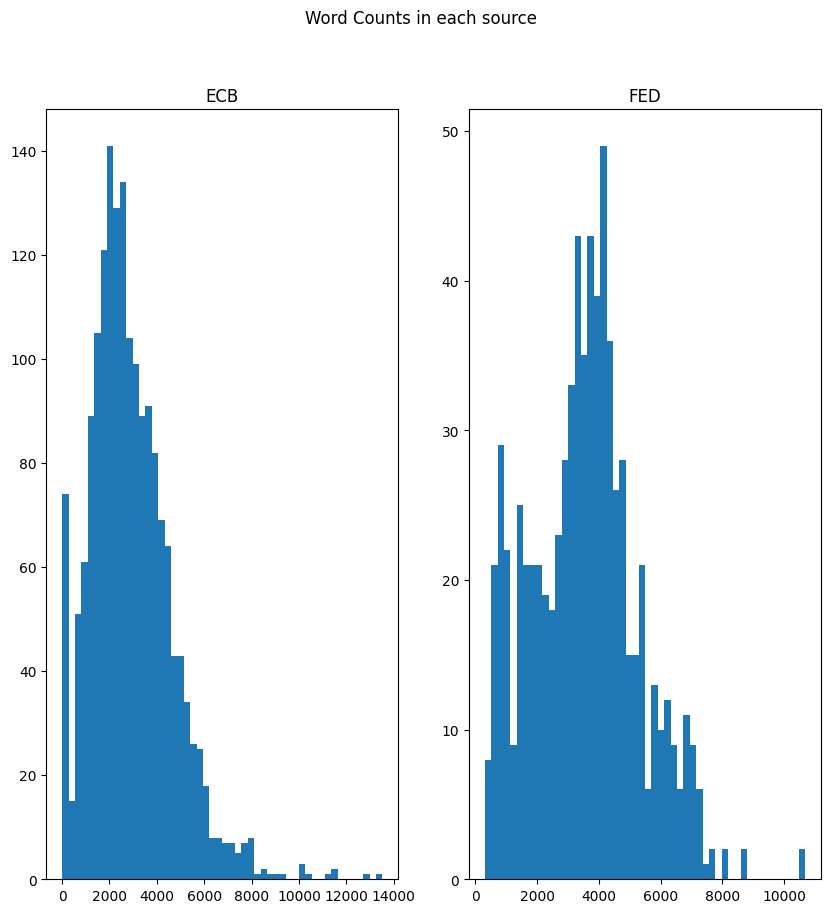

In [17]:
lenght_texts_ecb = [len(str(x).split(" ")) for x in df_ecb.text]
lenght_texts_fed = [len(str(x).split(" ")) for x in df_fed.text]
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].hist(lenght_texts_ecb, bins=50,label="No Preprocessing")
ax[0].set_title("ECB")
ax[1].hist(lenght_texts_fed, bins=50,label="No Preprocessing")
ax[1].set_title("FED")
fig.suptitle("Word Counts in each source")
plt.show()

Possible solutions -> Cut, Stop Words, Summarization 

## Footnotes and Introduction to the text

By looking into the text in detail, we discover many references to other texts and many footnotes. As a modeling choice, it could be interesting to get rid of this portion. 

Plus, before going into the main point, the speaker usually, takes 4 or 5 sentences to thank the audience or introduce himself. This part is not relevant and we would need to find a way to retrieve only the "main" part of the speech.

In [18]:
for txt in df_ecb.text[30:33]:
    print(f"""start of the speech:
{txt[:100]}
footnotes:
{txt[-100:]}\n""")


start of the speech:
  The essence of Economic and Monetary Union   Jean-Claude Trichet, President of the ECB, Speech as 
footnotes:
[1]Economic Governance in the EU, Standard Eurobarometer survey 74 (published 12 January 2011).     

start of the speech:
  Die Finanzmarktunion als Element einer stabilen Währungsunion?   Rede von Jörg Asmussen, Mitglied 
footnotes:
h hier und jetzt gleich mit Ihnen. Darauf freue ich mich. Vielen Dank für Ihre Aufmerksamkeit. ***  

start of the speech:
  Some lessons from the global financial turmoil   Speech by José Manuel González-Páramo, Member of 
footnotes:
he Financial Stability Forum on Enhancing Market and Institutional Resilience”, FSF, April 2008.    



Possible solution -> Regex

## Missing Texts

We noticed some null values for the text notably for the ECB with a couple dozens rows.

In [19]:
df_ecb.loc[df_ecb.text.isna()]

,title,speaker,text
40,"Die EZB, das Geld und die Wirtschaft: Von A wi...",Sabine Lautenschläger,NaN
104,Economic situation and outlook,Peter Praet,NaN
146,Economic developments in the euro area,Peter Praet,NaN
172,Unequal scars – distributional consequences of...,Isabel Schnabel,NaN
220,The economic outlook for the euro area,Philip R. Lane,NaN
257,Mehr Europa für eine stabile gemeinsame Währung,Isabel Schnabel,NaN
275,Better Regulation“ im Finanzsektor - die Sicht...,Gertrude Tumpel-Gugerell,NaN
291,The ECB's monetary policy strategy review - IM...,Philip R. Lane,NaN
332,Sources of risk and vulnerabilities for financ...,Luis de Guindos,NaN
413,Policy Frameworks and Strategies for an Open E...,Philip R. Lane,NaN


Possible solution -> Delete, Replace by the title of the speech

## Different Languages

The FED is a US institution which means every speech is spoken in English. But the ECB (European Central Bank) is composed of actors from all over Europe. English is the favored languages but we have also German or French Speech. 

In [20]:
df_ecb["lang"] = find_language(df_ecb.text) 
df_fed["lang"] = ["en" for _ in df_fed.text]
print(df_ecb.lang.value_counts())
print(df_fed.lang.value_counts())

en    1652
de      56
tl      34
es      16
fr      11
it       3
Name: lang, dtype: int64
en    739
Name: lang, dtype: int64


Warning: the "tl" languages means we have a null value (we will process them on the main notebook)

Possible Solution -> Traduction, Different Pipeline

## Different Speakers

Attached to the text, we have information regarding the speaker for the ECB and the FED

In [21]:
df_fed.speaker.value_counts()

Chairman Ben S. Bernanke                        145
Governor Lael Brainard                           68
Governor Daniel K. Tarullo                       54
Governor Jerome H. Powell                        50
Vice Chairman Stanley Fischer                    45
Governor Elizabeth A. Duke                       44
Chair Janet L. Yellen                            44
Vice Chairman Donald L. Kohn                     41
Vice Chair for Supervision Randal K. Quarles     39
Governor Randall S. Kroszner                     36
Chairman Jerome H. Powell                        32
Governor Frederic S. Mishkin                     26
Vice Chairman Richard H. Clarida                 26
Vice Chair Janet L. Yellen                       22
Governor Sarah Bloom Raskin                      17
Governor Kevin Warsh                             16
Governor Jeremy C. Stein                         16
Governor Michelle W. Bowman                      13
Governor Susan S. Bies                            3
Name: speake

In [22]:
df_ecb.speaker.value_counts()

Jean-Claude Trichet            216
Benoît Cœuré                   191
Mario Draghi                   186
Yves Mersch                    161
Peter Praet                    129
Vítor Constâncio               126
Lorenzo Bini Smaghi            105
Gertrude Tumpel-Gugerell        99
Sabine Lautenschläger           85
José Manuel González-Páramo     84
Jürgen Stark                    80
Luis de Guindos                 57
Jörg Asmussen                   51
Lucas Papademos                 45
Isabel Schnabel                 42
Christine Lagarde               41
Philip R. Lane                  40
Fabio Panetta                   26
Frank Elderson                   7
Name: speaker, dtype: int64

We have many speakers and we think it could be an interesting Categorical Variables. However, some have a really low volumen (less than 50 for example).

Possible Solution -> low volume to "Other", Categorical Encoding (Dummy, WOE...)

## Two Different sources ?

The texts come from two different sources that have a significant power over the financial world. We need to ask ourselves if we want to treat them separately or together. Some indices can be more ECB-focus or FED-focus. It can have a significant change in the developed architecture.

We tried to analyse how similar or different the corpora are in the following texts.

(We import a translated/lemmatized version of our corpora)

In [23]:
files_path = {
    "ecb": Path(path,"ecb_data_translate_cleaned.csv"),
    "fed": Path(path,"fed_data_translate_cleaned.csv"),
    "train_series": Path(path,"train_series.csv"),
}

# LOAD TEXT DATA
df_ecb, df_fed, _ = load_data(files_path)

In [24]:
from nltk.probability import FreqDist
fdist_ecb = FreqDist(" ".join(df_ecb.text_process.values).split(" "))
fdist_fed = FreqDist(" ".join(df_fed.text_process.values).split(" "))

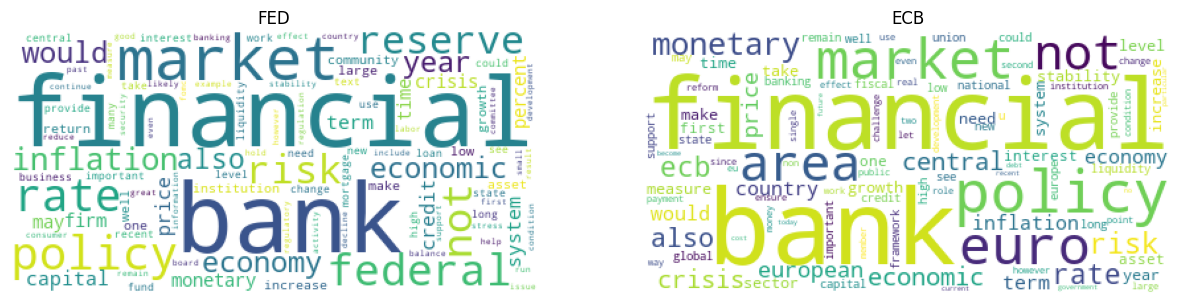

In [25]:
from wordcloud import WordCloud
common_fed = dict(fdist_fed.most_common(100))
common_ecb = dict(fdist_ecb.most_common(100))
wordcloud_fed = WordCloud(background_color = 'white', max_words = 100).generate_from_frequencies(common_fed)
wordcloud_ecb = WordCloud(background_color = 'white', max_words = 100).generate_from_frequencies(common_ecb)
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(wordcloud_fed)
ax[0].axis("off")
ax[0].set_title("FED")
ax[1].imshow(wordcloud_ecb)
ax[1].axis("off")
ax[1].set_title("ECB")
plt.show()

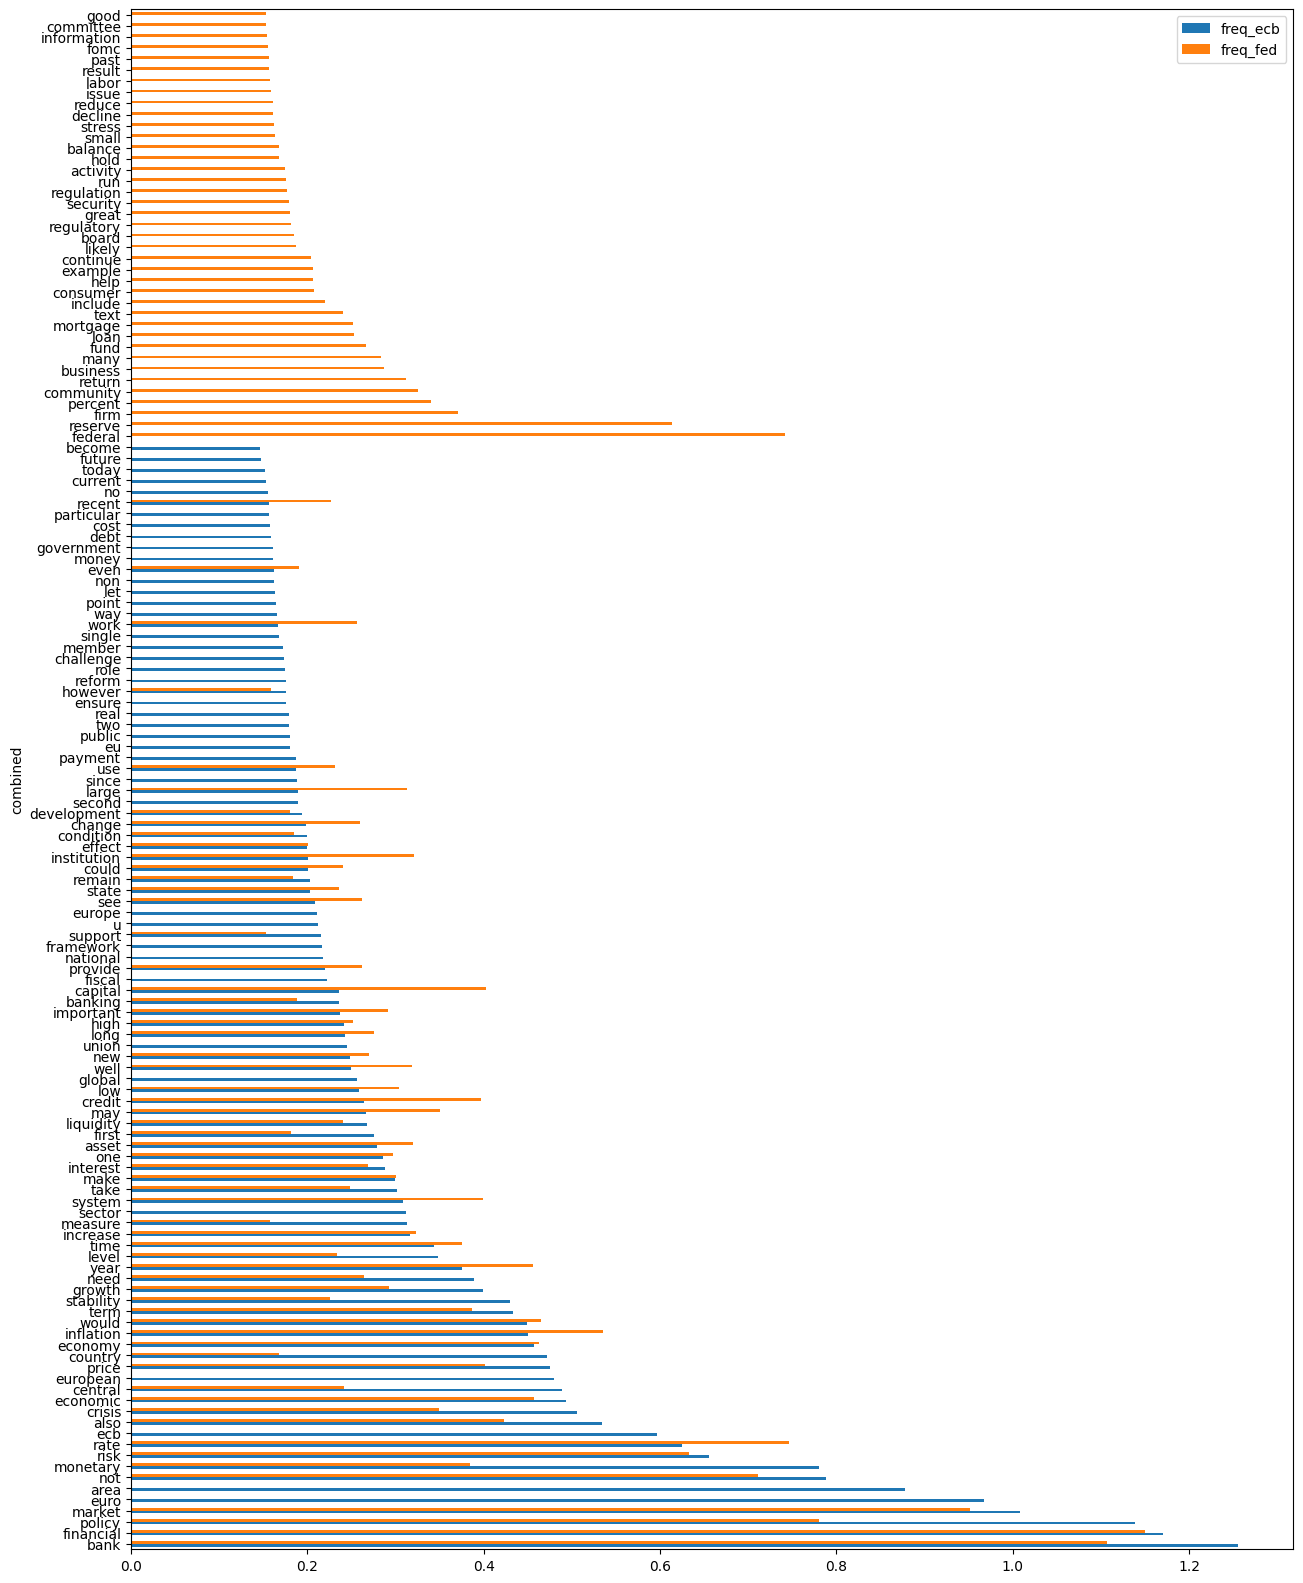

In [26]:
nb_tokens_ecb =len(" ".join(df_ecb.text_process.values).split(" "))
nb_tokens_fed = len(" ".join(df_fed.text_process.values).split(" "))
t = pd.DataFrame({"common_ecb": common_ecb.keys(), "freq_ecb": common_ecb.values()})
t2 = pd.DataFrame({"common_fed": common_fed.keys(), "freq_fed": common_fed.values()})
t_merge = pd.merge(t, t2, how="outer", left_on="common_ecb", right_on="common_fed")
t_merge["combined"] = [
    t_merge.iloc[i].common_ecb
    if str(t_merge.iloc[i].common_ecb) != "nan"
    else t_merge.iloc[i].common_fed
    for i in range(len(t_merge))
]
t_merge.freq_ecb = t_merge.freq_ecb/nb_tokens_ecb*100
t_merge.freq_fed = t_merge.freq_fed/nb_tokens_fed*100
t_merge.drop(["common_ecb","common_fed"], axis=1, inplace=True)
t_merge.set_index("combined",inplace=True)
t_merge.plot.barh(rot=0,figsize=(15,20))
plt.show()

# Time Series Analysis

In addition to text, we have time series of the indices 

## Number of Indices

The first thing to take into account the number of different stocks inside our dataset and to assess if it is unbalanced

In [27]:
df_train_series["Index Name"].value_counts()

V2X Index           994
MOVE Index          994
SPX Index           994
EURUSD Curncy       994
EURUSDV1M Curncy    994
CVIX Index          994
VIX Index           994
SX5E Index          994
SRVIX Index         994
Name: Index Name, dtype: int64

No Imbalance

Possible Solution -> Categorical Encoding, Different Models per indices (careful about the volume)

## Null Time Series

We noticed how some time series were set to 0. We believe there is not much to learn from this rows we could remove them. But they could appear in the validation dataset. We could decide to implement a business rule that states if the time series is set to 0, predict 0 without going into the full architecture.

In [28]:
df_train_series.loc[df_train_series['Index + 1']==0.0]['Index Name'].value_counts()

SRVIX Index         428
CVIX Index           70
MOVE Index           50
VIX Index            41
V2X Index            36
SPX Index            36
SX5E Index           25
EURUSDV1M Curncy     13
EURUSD Curncy         7
Name: Index Name, dtype: int64

In [29]:
df_train_series.loc[df_train_series['Index + 1']==0.0].tail()

,Index Name,Index - 9,Index - 8,Index - 7,Index - 6,Index - 5,Index - 4,Index - 3,Index - 2,Index - 1,Index - 0,index ecb,index fed,Index + 1
8850,SRVIX Index,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,720,"353,518",0.0
8871,SRVIX Index,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,802,313,0.0
8894,MOVE Index,-0.035839,-0.001974,-0.018953,0.012012,-0.033387,-0.016598,-0.009459,0.008412,-0.011585,-0.001060,784,166,0.0
8911,SRVIX Index,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1714,336,0.0
8926,MOVE Index,0.065799,-0.037191,0.010098,-0.006636,-0.003575,-0.037402,0.010659,0.048508,-0.018147,-0.052018,1036,134,0.0


Possible Solution -> Business rule, Regularization

# Multi Input Model

Our model will need to treat text and time series in parallel. Furthermore, we have up to 4 texts per source by time series. We have to find the best way to use each info as some indices might be more responsive to some texts.

In [30]:
df_train_series['index fed'].apply(func=lambda x: len(x.split(","))).unique()

array([1, 2, 3, 4], dtype=int64)

Possible Solution -> Split Architecture, Concatenate texts

## Target Imbalance ?

In [31]:
np.sign(df_train_series[["Index + 1"]]).value_counts()

Index + 1
-1.0         4224
 1.0         4016
 0.0          706
dtype: int64

No imbalance but 0 values should be processed